# U.S. Oil and Gas Production Analysis

Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [1]:
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [2]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [3]:
gas_df.shape

(121, 20)

In [4]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [5]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [7]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'])

gas_df['Month'].dtype

dtype('<M8[ns]')

### Check your code

In [8]:
month_type = gas_df['Month'].dtype

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult('date',
    month_type=month_type,
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/emirhankumus/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/emirhankumus/code/emirhankumus/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_date.py::TestDate::test_month_column_is_a_datetime PASSED           [100%]

============================== 1 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/date.pickle

git commit -m 'Completed date step'

git push origin master



In [10]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int32

In [11]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int32

---

## Yearly Gas production

In [12]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum(numeric_only=True)

yearly_gas_df.head()

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092


### Check your code

In [13]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/emirhankumus/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/emirhankumus/code/emirhankumus/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



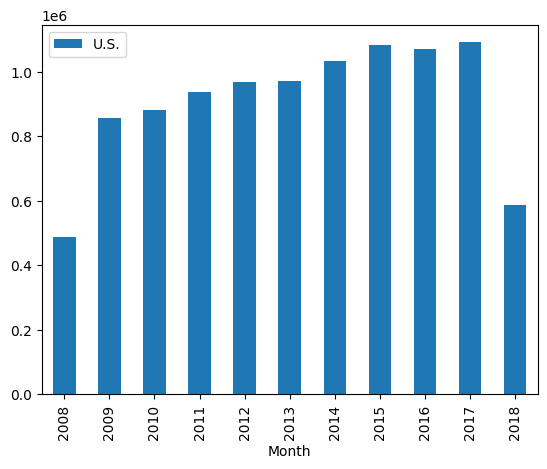

In [15]:
yearly_gas_df.filter(items=['U.S.']).plot(kind='bar');

In [16]:
filtered_yearly_gas_df = yearly_gas_df[(yearly_gas_df.index > 2008) & (yearly_gas_df.index < 2018)]

filtered_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


### Check your code

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape  
)
result.write()  

print(result.check())  


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/emirhankumus/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/emirhankumus/code/emirhankumus/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master



## State production

Let's have a look at the yearly production of some specific states

In [18]:
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

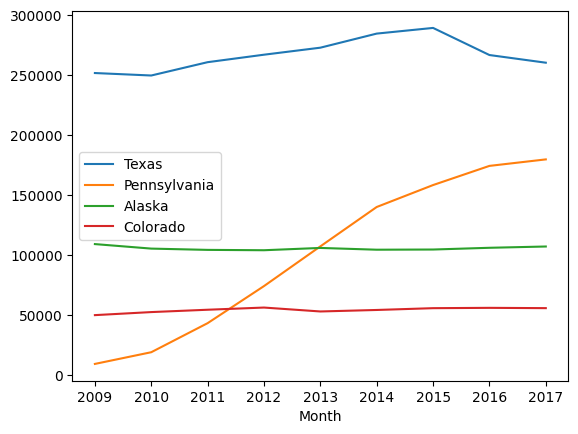

In [19]:
filtered_yearly_gas_df.filter(items=['Texas', 'Pennsylvania', 'Alaska', 'Colorado']).plot(kind='line');

---

## Comparing with Crude Oil Production

In [20]:
oil_df = pd.read_csv("data/U.S._crude_oil_production.csv", 
                     parse_dates=['Month'],
                     decimal=",")

oil_df.head(3)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1


---

## Yearly Oil production

In [21]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Month                                      121 non-null    datetime64[ns]
 1   U.S. Crude Oil                             121 non-null    int64         
 2   Alabama                                    121 non-null    int64         
 3   Alaska                                     121 non-null    int64         
 4   Arkansas                                   121 non-null    int64         
 5   Arizona                                    121 non-null    int64         
 6   California                                 121 non-null    int64         
 7   Colorado                                   121 non-null    int64         
 8   Federal Offshore Gulf of Mexico Crude Oil  121 non-null    int64         
 9   Federal Offshore Paci

In [22]:
yearly_oil_df = oil_df.groupby(oil_df['Month'].dt.year).sum(numeric_only=True)

print(yearly_oil_df.columns.tolist())

['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil', 'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota', 'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee']


In [23]:
yearly_oil_df.columns = yearly_oil_df.columns.str.strip()

print(yearly_oil_df.columns.tolist())

['U.S. Crude Oil', 'Alabama', 'Alaska', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil', 'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota', 'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee']


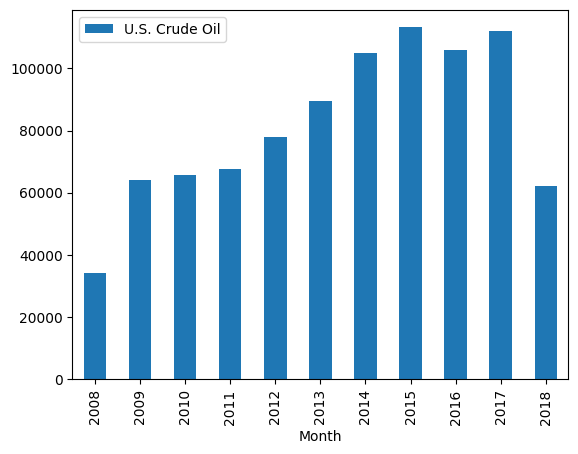

In [24]:
# Sadece U.S. Crude Oil sütununu seç ve bar chart çiz
yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar');

In [25]:
filtered_yearly_oil_df = yearly_oil_df[(yearly_oil_df.index > 2008) & (yearly_oil_df.index < 2018)]

filtered_yearly_oil_df

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Month,,,,,,,,,,,,,,,,,,,,,
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12
2014,105064,323,5958,224,0,6729,3139,16761,608,73,...,495,4605,222,60,2501,340,0,1346,38049,12
2015,113179,318,5796,205,0,6619,4036,18174,378,72,...,876,5484,232,53,2842,380,0,1222,41335,12
2016,105970,266,5874,183,0,6101,3820,19177,201,63,...,705,5102,207,47,2380,251,0,1001,38140,12
2017,112205,224,5936,173,0,5723,4293,20152,186,63,...,623,5454,217,46,2485,310,0,1125,41827,12


### Check your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('oil',
    filtered_oil_shape=filtered_yearly_oil_df.shape,        # (9, 35) bekliyoruz
    filtered_oil_index_year=filtered_yearly_oil_df.index[0], # 2009 bekliyoruz
    us_total=filtered_yearly_oil_df.iloc[0,0]                # 2009'un U.S. toplamı
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/emirhankumus/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/emirhankumus/code/emirhankumus/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_oil.py::TestOil::test_df_has_the_right_index PASSED                 [ 33%]
test_oil.py::TestOil::test_df_has_the_right_shape PASSED                 [ 66%]
test_oil.py::TestOil::test_df_has_the_right_values PASSED                [100%]

============================== 3 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/oil.pickle

git commit -m 'Completed oil step'

git push origin master



## Merging Oil and Gas Production

In [27]:
total_gas = filtered_yearly_gas_df.filter(items=['U.S.'])

total_gas = total_gas.rename(columns={'U.S.': 'Gas'})

total_oil = filtered_yearly_oil_df.filter(items=['U.S. Crude Oil'])

total_oil = total_oil.rename(columns={'U.S. Crude Oil': 'Crude Oil'})

merged_df = pd.concat([total_gas, total_oil], axis=1)

merged_df

,Gas,Crude Oil
Month,,
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585
2014,1032439,105064
2015,1082158,113179
2016,1070085,105970
2017,1090730,112205


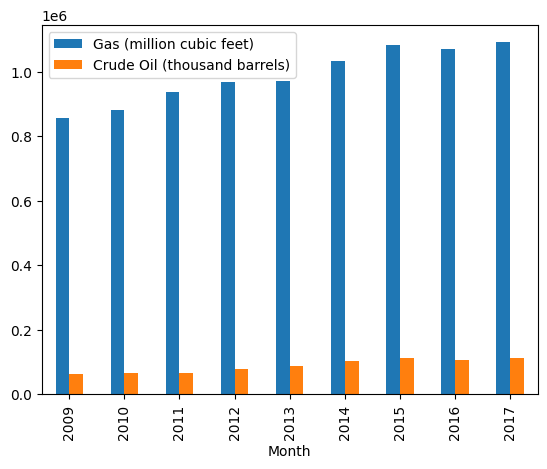

In [28]:
ax = merged_df.plot(kind='bar')

ax.legend(['Gas (million cubic feet)', 'Crude Oil (thousand barrels)']);

### Check your code

In [29]:
from nbresult import ChallengeResult

result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,                    # (9, 2) bekliyoruz
    yearly_oil_2009=merged_df.iloc[0]["Crude Oil"],     # 2009'un petrol toplamı
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/emirhankumus/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/emirhankumus/code/emirhankumus/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2009 PASSED [100%]

============================== 2 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master

